# End to end multiclass dog breed classification

this nootbook builds an end to end multiclass image classifier using Tenserflow 2.0 and Tenserflow hub

## 1. Problem

Identifying the breed of a dog given an imageof a dog

## 2. Data

The data we are using is from kaggle's dog breed identification competition

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilites for each dog breed for each test image

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We are dealing with images(unstructred data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (these means there are 120 diffirent classes)
* There are around 10000+ images in the training set (these images have labels)
* There are around 10000+ images in the test set (these images have no labels, we will want to predict them)

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)
print('GPU','available yesss' if tf.config.list_physical_devices('GPU') else 'not available :(')

2022-09-28 19:22:40.509981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-28 19:22:40.510048: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
0.12.0
GPU not available :(


2022-09-28 19:23:00.073408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-28 19:23:00.073734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-28 19:23:00.073889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-28 19:23:00.074095: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-28 19:23:00.074213: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [2]:
import pandas as pd

labels_csv = pd.read_csv('./data/dog-breed-identification/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

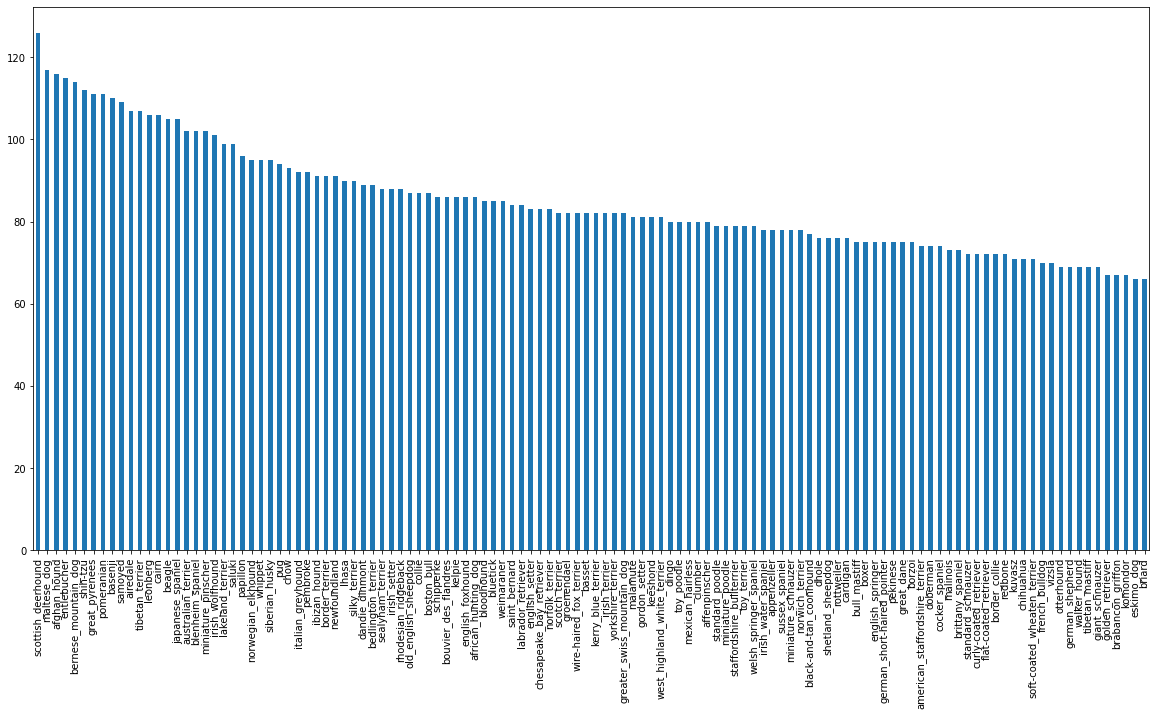

In [4]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

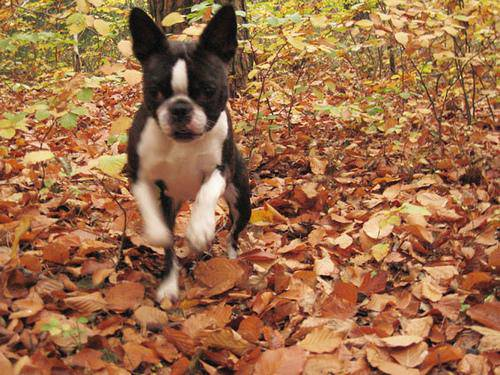

In [5]:
from IPython.display import Image
Image('./data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [6]:
# create path names from image Ids
filenames = ['./data/dog-breed-identification/train/' + fname + '.jpg' for fname in labels_csv['id']]

# filenames[:10]
len(filenames)

10222

In [7]:
import os
if len(os.listdir('./data/dog-breed-identification/train/')) == len(filenames):
  print('Filenames match actual amount of files!!!!, proceed')
else:
  print('Filenames do not match actual amount of files')

# len(os.listdir('./data/dog-breed-identification/train/'))

Filenames match actual amount of files!!!!, proceed


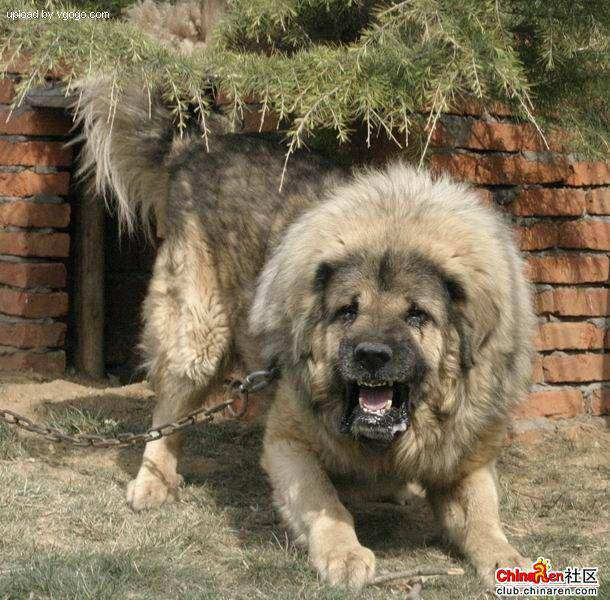

In [8]:
Image(filenames[9000])

In [9]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [10]:
labels_csv['breed']

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [11]:
labels_csv['breed'].to_numpy()

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
import numpy as np
labels =  np.array(labels_csv['breed'])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
# see if number of labels matches number of filenames
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames')
else:
  print('Number of labels does not matches number of filenames, check data directory!!')
  

Number of labels matches number of filenames


In [15]:
unique_breed = np.unique(labels)
len(unique_breed)

120

In [16]:
print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
boolean_labels = [label == unique_breed for label in labels]
boolean_labels
# len(boolean_labels)

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
print(labels[0])
print(np.where(labels[0] == unique_breed) )
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
print(boolean_labels[2].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
# make X and y
X = filenames
y = boolean_labels

In [21]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [23]:
X_train[:5], y_train[:5]

(['./data/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  './data/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  './data/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  './data/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  './data/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, 

# Preprocessing Images (turning images into Tensors)

To process our images into Tensors we are going to write a function which does few things

1. Take a image file path as input
2. Use Tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image(convert color channel values from 0-255 to 0-1 )
5. Resize the `image` to be a shape of (224,224)
6. return the modified `image`

In [24]:
# convert images into numpy array
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [25]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [26]:
# define image size
IMAGE_SIZE = 244

# create a function for preprocessing images

def preprocess_image(image_path):
  """
  Takes an image file path and turn the image into a tensor
  """
  # read in an image file
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desire value(224,224)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  
  return image

In [ ]:
tensor = tf.io.read_file(filenames[24])
tensor

In [28]:
tensor = tf.image.decode_jpeg(tensor, channels=3)
tensor

<tf.Tensor: shape=(280, 200, 3), dtype=uint8, numpy=
array([[[  0,   5,   0],
        [  0,   9,   0],
        [  1,  12,   4],
        ...,
        [  0,  14,   3],
        [ 12,  25,  15],
        [  0,   5,   0]],

       [[  0,  10,   1],
        [  5,  18,   9],
        [ 12,  23,  15],
        ...,
        [ 20,  36,  25],
        [ 34,  47,  37],
        [  9,  22,  12]],

       [[  0,  10,   2],
        [  8,  19,  11],
        [ 16,  27,  19],
        ...,
        [ 15,  33,  21],
        [ 26,  42,  31],
        [  0,  16,   5]],

       ...,

       [[  0,   2,   0],
        [  2,   7,   0],
        [  6,  11,   4],
        ...,
        [ 69,  85,  75],
        [ 87, 104,  96],
        [ 28,  45,  35]],

       [[  3,   8,   2],
        [  9,  14,   8],
        [ 11,  16,  10],
        ...,
        [120, 131, 125],
        [105, 117, 113],
        [ 13,  28,  21]],

       [[  0,   4,   0],
        [  3,   8,   2],
        [  3,   8,   2],
        ...,
        [ 17,  28,  2

In [29]:
tf.image.convert_image_dtype(tensor, tf.float32)


<tf.Tensor: shape=(280, 200, 3), dtype=float32, numpy=
array([[[0.        , 0.01960784, 0.        ],
        [0.        , 0.03529412, 0.        ],
        [0.00392157, 0.04705883, 0.01568628],
        ...,
        [0.        , 0.05490196, 0.01176471],
        [0.04705883, 0.09803922, 0.05882353],
        [0.        , 0.01960784, 0.        ]],

       [[0.        , 0.03921569, 0.00392157],
        [0.01960784, 0.07058824, 0.03529412],
        [0.04705883, 0.09019608, 0.05882353],
        ...,
        [0.07843138, 0.14117648, 0.09803922],
        [0.13333334, 0.18431373, 0.14509805],
        [0.03529412, 0.08627451, 0.04705883]],

       [[0.        , 0.03921569, 0.00784314],
        [0.03137255, 0.07450981, 0.04313726],
        [0.0627451 , 0.10588236, 0.07450981],
        ...,
        [0.05882353, 0.12941177, 0.08235294],
        [0.10196079, 0.16470589, 0.12156864],
        [0.        , 0.0627451 , 0.01960784]],

       ...,

       [[0.        , 0.00784314, 0.        ],
        [0.00

## Turning data in batches

why turning our data into batches?

Let say you are trying to process 10000+ images in one go... they all might not fit into memory

So that's why we do about 32 (this is the atch size) images at a time (you can manualy adjustthe batch size if need be)

in order to use Tenserflow effectively, we need our data in the form of Tensor tuples which look like this `(image, label)`

In [30]:
# create single function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    process image and return tuples (image, label) 
    """
    image = preprocess_image(image_path)
    return image, label


In [31]:
(preprocess_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
 array([[[0.33240733, 0.528404  , 0.32877645],
         [0.26302028, 0.454124  , 0.25184554],
         [0.24322662, 0.43179044, 0.22709224],
         ...,
         [0.29380426, 0.52090865, 0.32451057],
         [0.29776222, 0.52521324, 0.33200315],
         [0.29484236, 0.5222934 , 0.33405805]],
 
        [[0.26853722, 0.46210465, 0.27810386],
         [0.24625303, 0.4426449 , 0.25299522],
         [0.2679708 , 0.4562061 , 0.2626349 ],
         ...,
         [0.28107235, 0.50784814, 0.3127341 ],
         [0.28670043, 0.51383805, 0.3265429 ],
         [0.2895012 , 0.5166388 , 0.3293437 ]],
 
        [[0.21171938, 0.41078815, 0.25436452],
         [0.23509896, 0.43457666, 0.27692637],
         [0.28364372, 0.47278884, 0.3107396 ],
         ...,
         [0.26476204, 0.49106047, 0.3046848 ],
         [0.27449086, 0.4980203 , 0.32259437],
         [0.28086528, 0.5043947 , 0.3289688 ]],
 
        ...,
 
        [[0.0082752 , 0.04095767

 Now we have got a way to turn our data into tuples of Tensors in the form `(image, label)`, lets make a function into batches 

In [32]:
# define a batch size
BATCH_SIZE = 32

# create a function to turn data into batches


def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of image (X) and and label(y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels)  
    """

    # If the data is test dataset, we probably don't have have labels
    if test_data:
        print('Creating test data batches...')
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X)))  # only file paths no labels
        data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
        return data_batch

    # if the data is valid dataset we don't need to shuffle it
    elif valid_data:
        print('Creating validation data batches...')
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print('Creating training data batches')
        # Turn file path and labels into tensors
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), tf.constant(y)))

        # Shuffling path names and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        # Create (image, labels) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)

    return data_batch


In [33]:
# create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val,valid_data=True)

Creating training data batches
Creating validation data batches...


In [34]:
# check out the diffirent attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [38]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch


def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from the data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # loop through 25 for displaying 25 images
    for i in range(25):
        # create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # display an image
        plt.imshow(images[i])
        # add the image label as title
        plt.title(unique_breed[labels[i].argmax()])
        # turn the grid line off
        plt.axis('off')


In [39]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

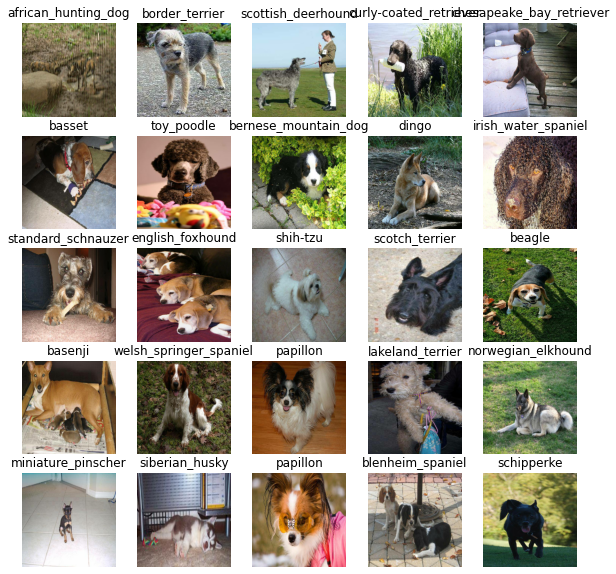

In [44]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

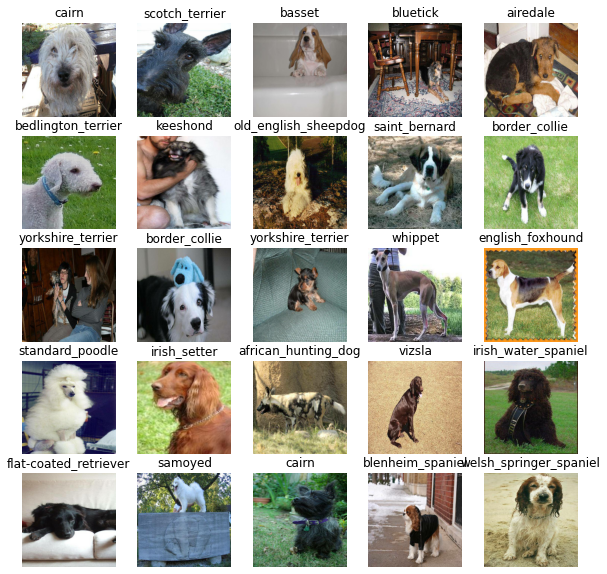

In [46]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)